In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/1/Data/housing/boston_house_prices.csv', header = 1)
# столбец MEDV - целевая переменная (стоимость жилья в тыс. долларов)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


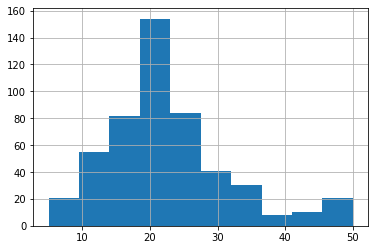

In [4]:
data['MEDV'].hist()

In [5]:
X = data.iloc[:, :-1].values

In [6]:
X.shape

(506, 13)

In [7]:
X_norm = scale(X)

In [8]:
Y = data['MEDV'].values

In [9]:
# генератор разбиений
kf = KFold(n_splits = 5, 
          shuffle = True, 
          random_state = 42)

In [10]:
# шаги для перебора значений параметра p и значение шага
steps_for_p, step = np.linspace(1, 10, num = 200, endpoint = True, retstep = True)

In [11]:
step

0.04522613065326633

In [12]:
def scores(steps_for_p, data, labels, kf):
    list_of_scores = []
    
    for p in steps_for_p:
        kNR = KNeighborsRegressor(n_neighbors = 5, 
                                  weights = 'distance', 
                                  metric = 'minkowski', 
                                  p = p)
        
        score = cross_val_score(kNR, data, labels, cv = kf, scoring = 'neg_mean_squared_error').mean()
        
        list_of_scores.append(score)
    
    print(f'Bset parameter: {1 + step*list_of_scores.index(max(list_of_scores))}')
    print(f'Best score: {round(max(list_of_scores), 3)}')
    print()
    for i, score in enumerate(list_of_scores):
        print(f'For p = {steps_for_p[i]} score = {score}')

In [13]:
scores(steps_for_p, X_norm, Y, kf)

Bset parameter: 1.0
Best score: -16.031

For p = 1.0 score = -16.030646734221644
For p = 1.0452261306532664 score = -16.407838708329997
For p = 1.0904522613065326 score = -16.37069694705904
For p = 1.135678391959799 score = -16.445716308439433
For p = 1.1809045226130652 score = -16.475057773399406
For p = 1.2261306532663316 score = -16.52643232931826
For p = 1.271356783919598 score = -16.636709345898257
For p = 1.3165829145728645 score = -16.82422425426731
For p = 1.3618090452261307 score = -16.874209056598744
For p = 1.4070351758793969 score = -17.124898819792115
For p = 1.4522613065326633 score = -17.145231882153894
For p = 1.4974874371859297 score = -17.01936008026763
For p = 1.542713567839196 score = -17.09913173771377
For p = 1.5879396984924623 score = -16.801326640288362
For p = 1.6331658291457287 score = -16.980745198189776
For p = 1.678391959798995 score = -17.033458903647716
For p = 1.7236180904522613 score = -17.17164190266228
For p = 1.7688442211055277 score = -17.1816791690